Number of nodes: 4039
Number of edges: 88234
Graph density: 0.0108
Average node degree: 43.69


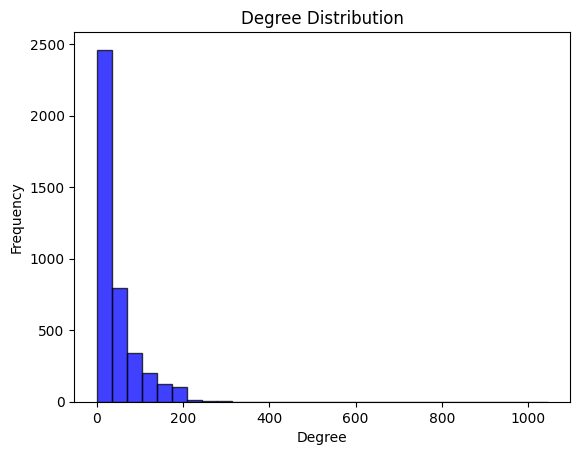

Average shortest path length: 3.69
Average clustering coefficient: 0.6055


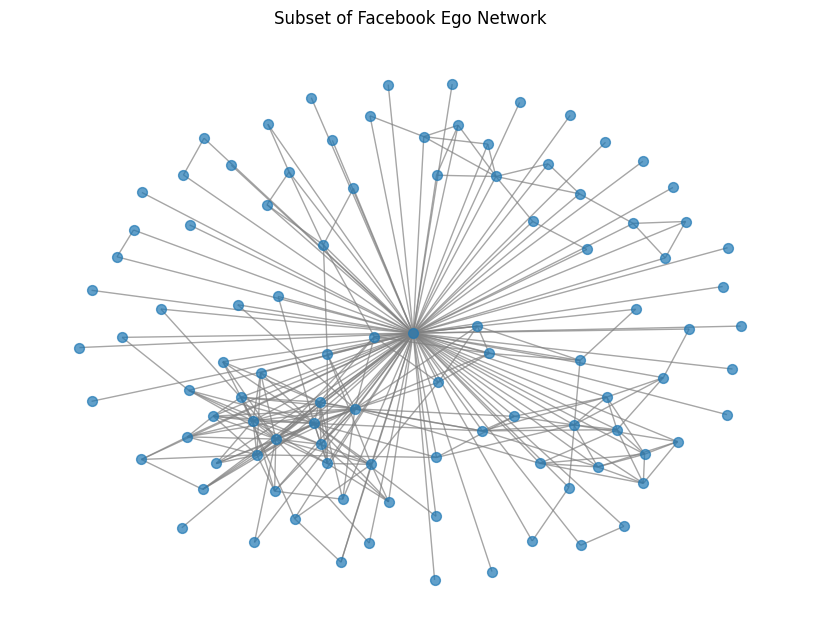

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)

# Basic graph statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Graph density: {density:.4f}")
print(f"Average node degree: {avg_degree:.2f}")

# Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

# Average shortest path length (only for connected graphs)
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print(f"Average shortest path length: {avg_shortest_path:.2f}")
else:
    print("Graph is not connected; computing average shortest path length on largest component.")
    largest_cc = max(nx.connected_components(G), key=len)
    G_largest = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(G_largest)
    print(f"Average shortest path length (largest component): {avg_shortest_path:.2f}")

# Clustering coefficient
clustering_coeff = nx.average_clustering(G)
print(f"Average clustering coefficient: {clustering_coeff:.4f}")

# Plot the graph with spring layout (subset for visualization)
plt.figure(figsize=(8, 6))
subgraph = G.subgraph(list(G.nodes())[:100])  # Take a small subset to avoid overloading visualization
nx.draw(subgraph, with_labels=False, node_size=50, edge_color="gray", alpha=0.7)
plt.title("Subset of Facebook Ego Network")
plt.show()


&nbsp;

**LogLog Plot**

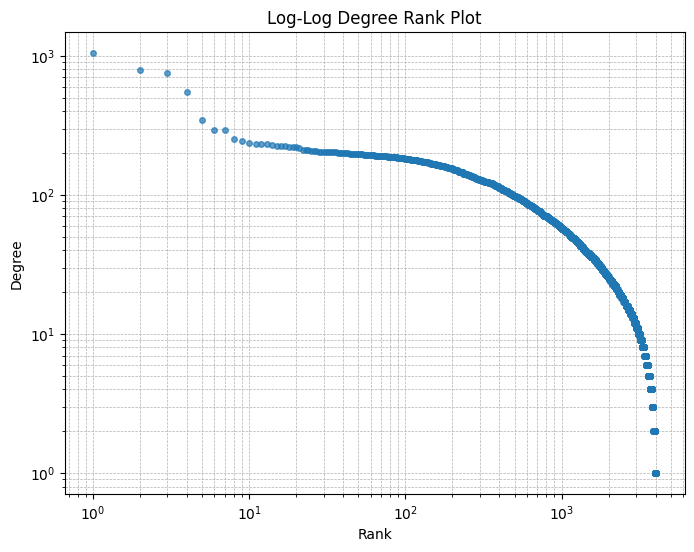

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the data
file_path = "facebook_combined.txt"
edges = np.loadtxt(file_path, dtype=int)

# Count the degree of each node
degree_counts = Counter(edges.flatten())
degrees, counts = zip(*degree_counts.items())

# Convert to numpy arrays
degrees = np.array(degrees)
counts = np.array(counts)

# Sort degrees in descending order
sorted_counts = np.sort(counts)[::-1]
ranks = np.arange(1, len(sorted_counts) + 1)

# Create log-log degree rank plot
plt.figure(figsize=(8,6))
plt.loglog(ranks, sorted_counts, marker="o", linestyle="None", markersize=4, alpha=0.7)
plt.xlabel("Rank")
plt.ylabel("Degree")
plt.title("Log-Log Degree Rank Plot")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


&nbsp;

**Number of Nodes, Edges and Diameter of Graph, Shortest Path**

In [ ]:
import networkx as nx

# Load the graph
file_path = "facebook_combined.txt"
G = nx.read_edgelist(file_path, nodetype=int)

# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Diameter (requires a connected graph)
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print(f"Diameter: {diameter}")
else:
    print("Graph is not connected, so diameter is not defined.")

# Shortest Path
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print(f"Average shortest path length: {avg_shortest_path}")
else:
    print("Graph is not connected, so the average shortest path is undefined.")



Number of nodes: 4039
Number of edges: 88234
Diameter: 8
Average shortest path length: 3.6925068496963913


**Degree Centrality, Closeness Centrality, Betweenness Centrality**

In [ ]:
import networkx as nx
import pandas as pd

# Load the edge list from the file
file_path = "facebook_combined.txt"
G = nx.read_edgelist(file_path, nodetype=int)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame for better visualization
centrality_df = pd.DataFrame({
    "Node": list(G.nodes()),
    "Degree Centrality": [degree_centrality[node] for node in G.nodes()],
    "Closeness Centrality": [closeness_centrality[node] for node in G.nodes()],
    "Betweenness Centrality": [betweenness_centrality[node] for node in G.nodes()]
})

# Sort by Degree Centrality and display top 10
print("Top 10 Nodes by Degree Centrality:")
print(centrality_df.sort_values(by="Degree Centrality", ascending=False).head(10))

# Sort by Closeness Centrality and display top 10
print("\nTop 10 Nodes by Closeness Centrality:")
print(centrality_df.sort_values(by="Closeness Centrality", ascending=False).head(10))

# Sort by Betweenness Centrality and display top 10
print("\nTop 10 Nodes by Betweenness Centrality:")
print(centrality_df.sort_values(by="Betweenness Centrality", ascending=False).head(10))

# Display the full DataFrame
centrality_df


Top 10 Nodes by Degree Centrality:
      Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
107    107           0.258791              0.459699                0.480518
351   1684           0.196137              0.393606                0.337797
352   1912           0.186974              0.350947                0.229295
1821  3437           0.135463              0.314413                0.236115
0        0           0.085934              0.353343                0.146306
1490  2543           0.072808              0.291300                0.007605
2154  2347           0.072065              0.283408                0.003200
1373  1888           0.062902              0.321292                0.000118
1285  1800           0.060674              0.321599                0.000153
1149  1663           0.058197              0.339185                0.001100

Top 10 Nodes by Closeness Centrality:
     Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
107   107      

,Node,Degree Centrality,Closeness Centrality,Betweenness Centrality
0,0,0.085934,0.353343,1.463059e-01
1,1,0.004210,0.261376,2.783274e-06
2,2,0.002476,0.261258,7.595021e-08
3,3,0.004210,0.261376,1.685066e-06
4,4,0.002476,0.261258,1.840332e-07
...,...,...,...,...
4034,4034,0.000495,0.183989,0.000000e+00
4035,4035,0.000248,0.183980,0.000000e+00
4036,4036,0.000495,0.183989,0.000000e+00
4037,4037,0.000991,0.184005,7.156847e-08


**Small World Network and Heavy-Tail Analysis**

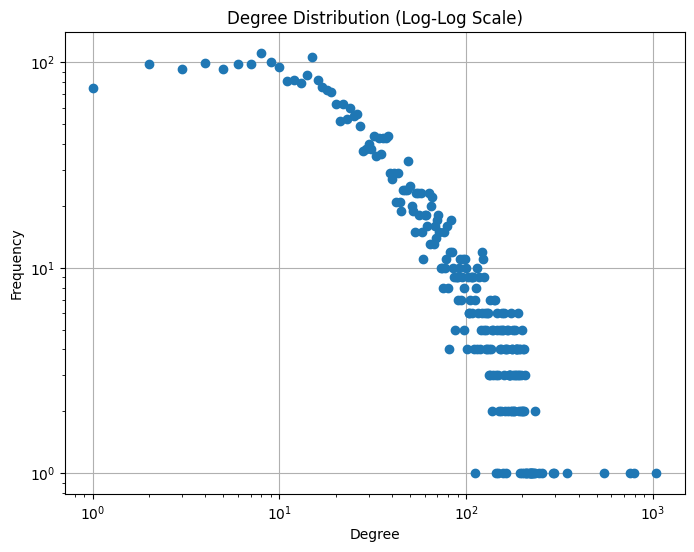

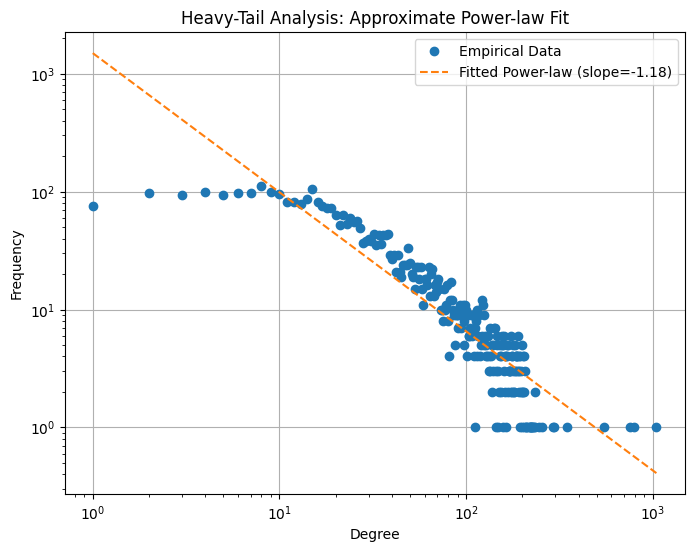

Estimated power-law exponent: -1.18


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load the edge list
file_path = "facebook_combined.txt"  # Update with the correct path if needed
edges = pd.read_csv(file_path, sep=" ", header=None, names=["node1", "node2"])

# Create an undirected graph
G = nx.Graph()
G.add_edges_from(edges.values)

# Compute degree distribution
degree_sequence = np.array([d for _, d in G.degree()])
unique_degrees, counts = np.unique(degree_sequence, return_counts=True)

# Plot degree distribution (log-log scale)
plt.figure(figsize=(8,6))
plt.loglog(unique_degrees, counts, marker="o", linestyle="None")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution (Log-Log Scale)")
plt.grid(True)
plt.show()

# Estimate a power-law fit using linear regression in log-log space
log_degrees = np.log(unique_degrees)  # Avoid log(0)
log_counts = np.log(counts)

# Perform linear regression in log-log space
slope, intercept = np.polyfit(log_degrees, log_counts, 1)

# Plot the fitted power-law distribution
plt.figure(figsize=(8,6))
plt.loglog(unique_degrees, counts, marker="o", linestyle="None", label="Empirical Data")
plt.loglog(unique_degrees, np.exp(intercept) * unique_degrees**slope, linestyle="--", label=f"Fitted Power-law (slope={slope:.2f})")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Heavy-Tail Analysis: Approximate Power-law Fit")
plt.legend()
plt.grid(True)
plt.show()

# Print estimated power-law exponent
print(f"Estimated power-law exponent: {slope:.2f}")


**Clustering Coefficient**

In [ ]:
# Compute clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering coefficient: {clustering_coefficient:.4f}")


Clustering coefficient: 0.6055


**Comparison to the Watts-Strogatz model**

In [13]:
import networkx as nx
import numpy as np
import pandas as pd

# Load the provided edge list
file_path = "facebook_combined.txt"
G = nx.read_edgelist(file_path, nodetype=int)

# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]
avg_degree = np.mean(degree_sequence)

# Compute clustering coefficient
clustering_coeffs = nx.clustering(G)
avg_clustering = np.mean(list(clustering_coeffs.values()))

# Estimate average shortest path length (sampling to speed up computation)
sample_size = min(200, G.number_of_nodes())  # Limit to 200 nodes for efficiency
sampled_nodes = np.random.choice(list(G.nodes), size=sample_size, replace=False)
path_lengths = []
for node in sampled_nodes:
    lengths = nx.single_source_shortest_path_length(G, node)
    path_lengths.extend(list(lengths.values()))

avg_path_length_estimated = np.mean(path_lengths)

# Store original network results
network_stats = {
    "Original Network": {
        "Nodes": G.number_of_nodes(),
        "Edges": G.number_of_edges(),
        "Avg Degree": avg_degree,
        "Avg Clustering Coefficient": avg_clustering,
        "Avg Shortest Path Length": avg_path_length_estimated,
    }
}

# Display original network statistics
df = pd.DataFrame(network_stats).T
print("\nOriginal Network Statistics:")
print(df)

# Generate a comparable Watts-Strogatz model
N = G.number_of_nodes()
k = int(avg_degree)  # Use the average degree as the parameter for k
p = 0.1  # Typical rewiring probability for small-world networks

WS_G = nx.watts_strogatz_graph(N, k, p)

# Compute clustering coefficient for WS model
ws_avg_clustering = nx.average_clustering(WS_G)

# Estimate shortest path length for WS model using sampling
sampled_nodes_ws = np.random.choice(list(WS_G.nodes), size=sample_size, replace=False)
path_lengths_ws = []
for node in sampled_nodes_ws:
    lengths = nx.single_source_shortest_path_length(WS_G, node)
    path_lengths_ws.extend(list(lengths.values()))

ws_avg_path_length_estimated = np.mean(path_lengths_ws)

# Store final comparison results
network_comparison = {
    "Original Network": {
        "Avg Clustering Coefficient": avg_clustering,
        "Avg Degree": avg_degree,
        "Avg Shortest Path Length": avg_path_length_estimated,
        "Edges": G.number_of_edges(),
        "Nodes": G.number_of_nodes(),
    },
    "Watts-Strogatz Model": {
        "Avg Clustering Coefficient": ws_avg_clustering,
        "Avg Degree": k,
        "Avg Shortest Path Length": ws_avg_path_length_estimated,
        "Edges": WS_G.number_of_edges(),
        "Nodes": WS_G.number_of_nodes(),
    },
}

# Display final comparison
df_comparison = pd.DataFrame(network_comparison).T
print("\nComparison Between Original Network and Watts-Strogatz Model:")
print(df_comparison)



Original Network Statistics:
                   Nodes    Edges  Avg Degree  Avg Clustering Coefficient  \
Original Network  4039.0  88234.0   43.691013                    0.605547   

                  Avg Shortest Path Length  
Original Network                  3.648674  

Comparison Between Original Network and Watts-Strogatz Model:
                      Avg Clustering Coefficient  Avg Degree  \
Original Network                        0.605547   43.691013   
Watts-Strogatz Model                    0.534884   43.000000   

                      Avg Shortest Path Length    Edges   Nodes  
Original Network                      3.648674  88234.0  4039.0  
Watts-Strogatz Model                  3.002497  84819.0  4039.0  
